<a href="https://colab.research.google.com/github/Zakeer2811/Diabetes-Prediction/blob/main/diabetcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18274    26]
 [  528  1172]]

ROC AUC Score: 0.98
Accuracy Score: 0.97
F1 Score: 0.81
Recall Score: 0.69


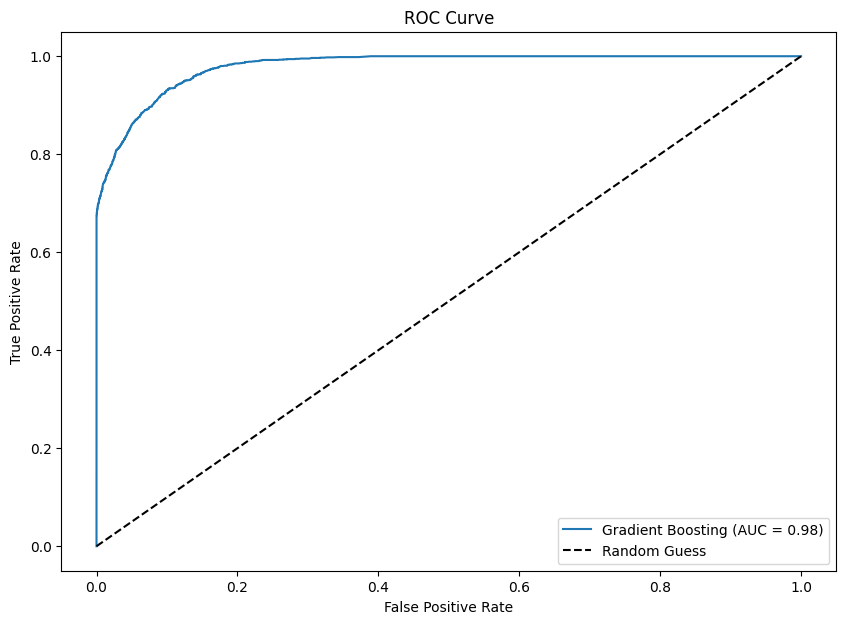

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,f1_score,recall_score
from sklearn.ensemble import GradientBoostingClassifier


# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Split data into features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.2f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Cross-Validation Accuracy Scores: [0.973125  0.9724375 0.972375  0.971     0.970625 ]
Mean CV Accuracy: 0.97
Standard Deviation of CV Accuracy: 0.00

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.98      0.69      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
[[18274    26]
 [  528  1172]]

ROC AUC Score: 0.98
Accuracy Score: 0.97


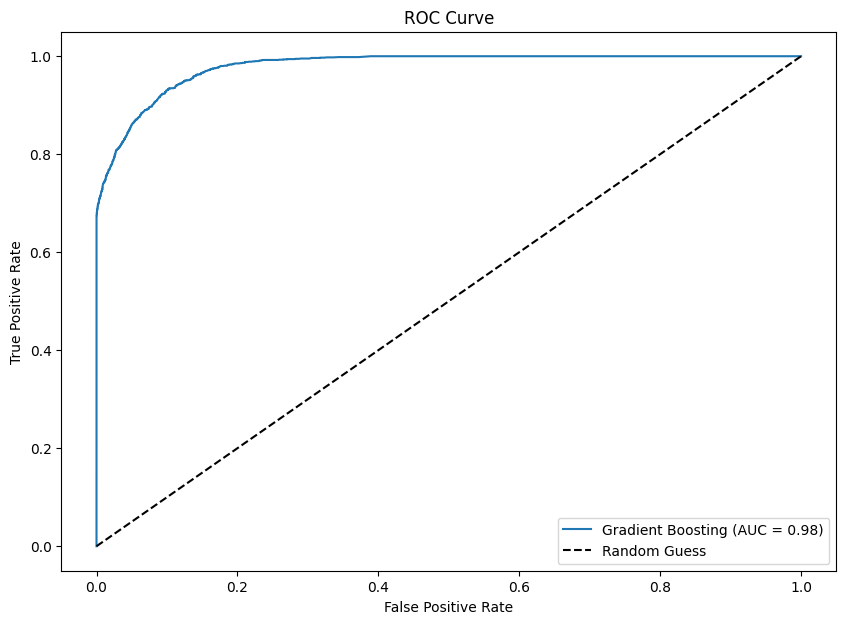

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.2f}")

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters and Score
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

# Evaluate the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")




In [ ]:
import joblib
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred):.2f}")
model_filename = 'gradient_boosting_model.pkl'
joblib.dump(best_model, model_filename)
print(f"\nModel saved to {model_filename}")

F1 Score: 0.81
Recall Score: 0.69

Model saved to gradient_boosting_model.pkl


In [ ]:
# Save the scaler
import joblib
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

# Save the label encoders
encoder_filenames = {}
for col, le in label_encoders.items():
    encoder_filename = f'{col}_encoder.pkl'
    joblib.dump(le, encoder_filename)
    encoder_filenames[col] = encoder_filename
    print(f"Encoder for {col} saved to {encoder_filename}")


Scaler saved to scaler.pkl
Encoder for gender saved to gender_encoder.pkl
Encoder for smoking_history saved to smoking_history_encoder.pkl


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    # Save the encoder to a file
    joblib.dump(le, f"{col}_encoder.pkl")
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

print("Preprocessing objects saved successfully:")
print("- scaler.pkl for StandardScaler")
print("- gender_encoder.pkl for gender LabelEncoder")
print("- smoking_history_encoder.pkl for smoking_history LabelEncoder")


Preprocessing objects saved successfully:
- scaler.pkl for StandardScaler
- gender_encoder.pkl for gender LabelEncoder
- smoking_history_encoder.pkl for smoking_history LabelEncoder


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Encode categorical features
gender_encoder = LabelEncoder()
data['gender'] = gender_encoder.fit_transform(data['gender'])

smoking_history_encoder = LabelEncoder()
data['smoking_history'] = smoking_history_encoder.fit_transform(data['smoking_history'])

# Save encoders
joblib.dump(gender_encoder, 'gender_encoder.pkl')
joblib.dump(smoking_history_encoder, 'smoking_history_encoder.pkl')

# Standardize numerical features
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Prepare features (X) and target (y)
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

Dataset preview:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
Columns in dataset:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
Data preprocessing complete.
Classification Report:
              precision    recall

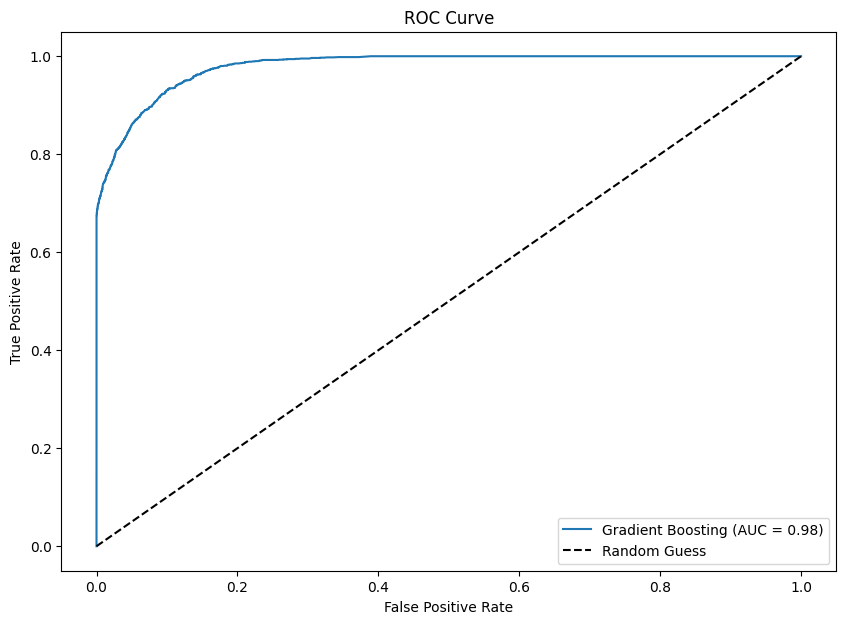

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Display dataset structure
print("Dataset preview:")
print(data.head())

# Columns: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level
print("Columns in dataset:")
print(data.columns)

# Encode categorical features
gender_encoder = LabelEncoder()
smoking_history_encoder = LabelEncoder()

data['gender'] = gender_encoder.fit_transform(data['gender'])
data['smoking_history'] = smoking_history_encoder.fit_transform(data['smoking_history'])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Save encoders and scaler
joblib.dump(gender_encoder, 'gender_encoder.pkl')
joblib.dump(smoking_history_encoder, 'smoking_history_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']

# Save feature names for alignment during prediction
joblib.dump(X.columns.tolist(), 'feature_names.pkl')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing complete.")

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'model.pkl')

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
